In [863]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [912]:
u_cols = ['user_id','age','gender','occupation','zipcode']
users = pd.read_csv("movieLens/u.user",sep = "|", names = u_cols,encoding='latin-1')

r_cols = ["user_id","movie_id","rating","timestamp"]
ratings = pd.read_csv("movieLens/u.data",sep = "\t" , names = r_cols , encoding="latin-1")

m_cols = ["movie_id","title","release_date","video_release_date","IMDb URL","unknown", "Action" , "Adventure" , "Animation" ,
              "Children", "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
              "Film-Noir" , "Horror" , "Musical", "Mystery" , "Romance" , "Sci-Fi" ,
              "Thriller" , "War" , "Western" ]

movies = pd.read_csv("movieLens/u.item",sep = "|",names = m_cols,encoding="latin-1")

movie_ratings = pd.merge(movies,ratings)
data = pd.merge(users,movie_ratings)
data.head()

,user_id,age,gender,occupation,zipcode,movie_id,title,release_date,video_release_date,IMDb URL,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,timestamp
0,1,24,M,technician,85711,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,...,0,0,0,0,0,0,0,0,5,874965758
1,1,24,M,technician,85711,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,...,0,0,0,0,0,1,0,0,3,876893171
2,1,24,M,technician,85711,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,...,0,0,0,0,0,1,0,0,4,878542960
3,1,24,M,technician,85711,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,...,0,0,0,0,0,0,0,0,3,876893119
4,1,24,M,technician,85711,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),...,0,0,0,0,0,1,0,0,3,889751712


In [865]:
n_users = data.user_id.nunique()
n_features = len(data.columns) -1 
gender = data.groupby("gender").user_id.nunique()
n_male = gender.M
n_femal = gender.F
mean_rating = data.rating.mean()
std_dev = data.rating.std()

print("Total number of users {}".format(n_users))
print("Total number of features {}".format(n_features))
print("Number of Male users {}".format(n_male))
print("Number of female users {}".format(n_femal))
print("Mean rating {} ".format(mean_rating))
print("Standard deviation of ratings is {}".format(std_dev))

Total number of users 943
Total number of features 30
Number of Male users 670
Number of female users 273
Mean rating 3.52986 
Standard deviation of ratings is 1.12567359914


In [866]:
most_rated = data.groupby('movie_id').size().sort_values(ascending=False)[:100] #most rated 500 movies

#print(most_rated)
title_rating = data.groupby("title").agg({"rating":[np.size,np.mean]})
atleast100 = title_rating["rating"]["size"] >= 100
top_rated = title_rating[atleast100].sort_values([("rating","mean")] , ascending = False)[:10] #top 10 rated movies
#print(top_rated)

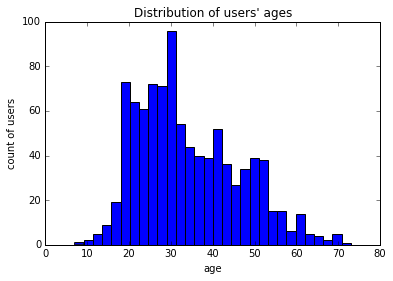

In [867]:
plt = users.age.plot.hist(bins = 30)
plt.set_title("Distribution of users' ages")
plt.set_ylabel('count of users')
plt.set_xlabel('age');

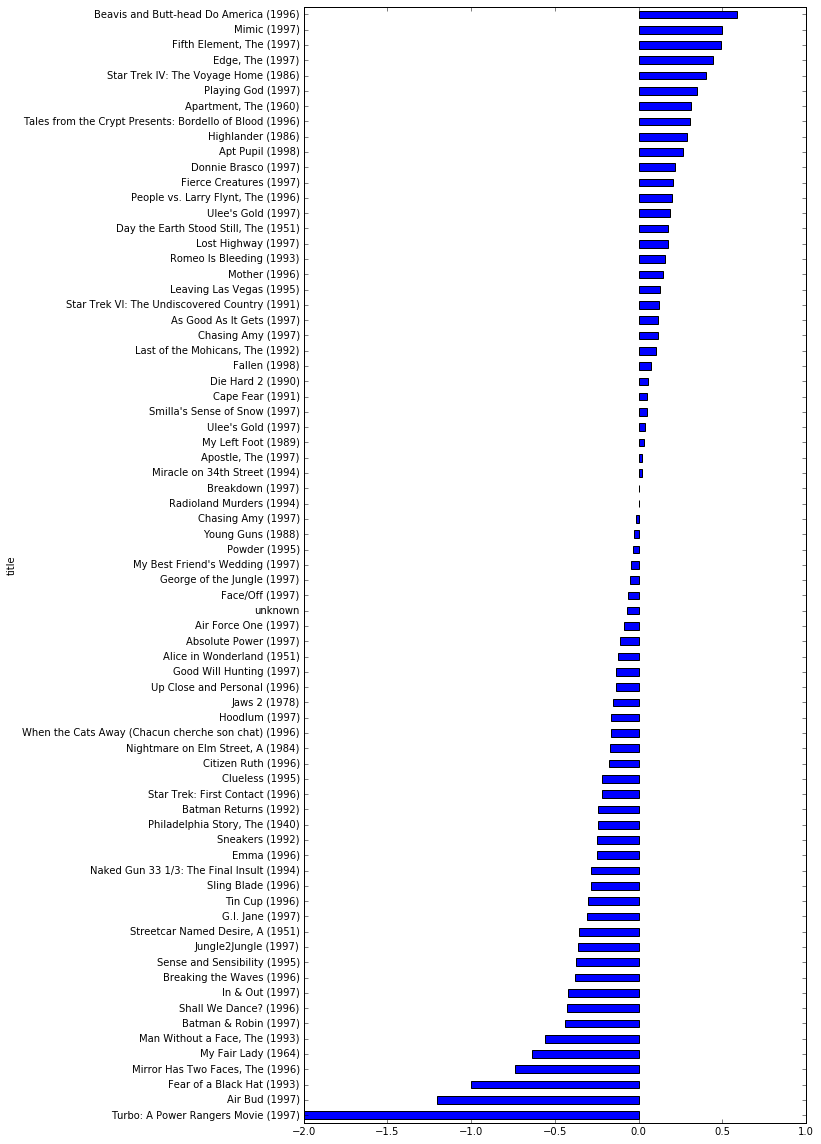

In [868]:
pivoted = data.pivot_table(index=["movie_id","title"],columns=["gender"],values="rating",fill_value=0)
pivoted["diff"]=pivoted.M-pivoted.F
pivoted.reset_index("movie_id",inplace=True)
disagreements = pivoted[pivoted.movie_id.isin(most_rated)]["diff"]
#pivoted.head()
disagreements.sort_values().plot(kind="barh",figsize=[9,20])

plt.set_title("Male vs. Female Avg. Ratings for top 100 movies")
plt.set_ylabel('Title')

In [918]:
most_rated = data.groupby('movie_id').size().sort_values(ascending=False)[:500] #most rated 500 movies
disagreements = pivoted[pivoted.movie_id.isin(most_rated)]["diff"]
male_choices = disagreements[disagreements>0]
female_choices = disagreements[disagreements<0]
male_choicesDF = pd.DataFrame(male_choices,columns=["diff"])
female_choicesDF = pd.DataFrame(female_choices,columns=["diff"])
male_choicesDF.reset_index("title",inplace=True)
female_choicesDF.reset_index("title",inplace=True)


 

flag = 0 
dict = defaultdict(int)
for i,val in enumerate(male_choicesDF.title):
    for j,val2 in enumerate(movies.title):
        if val == val2 and flag == 0:
            mov = data.loc[data["title"] == val2]
           
            print rating


In [941]:
def get_genre(df):
    dict = defaultdict(int)
    for i,val in enumerate(df.title):
        for j,val2 in enumerate(movies.title):
            if val == val2:
                mov = data.loc[data["title"] == val2]
                for col in mov.columns[11:29]:
                    rating = mov[col].values[0]
                    if rating == 1:
                        dict[col] = dict[col] + 1

    return dict

"""        for j,val2 in data.iterrows():
            if val == val2["title"]:
                for k , item in val2[11:29].iteritems():
                    if item == 1:
                        dict[k] = dict[k] + 1"""

""" for i,val in enumerate(df.title):
        for j,val2 in enumerate(movies.title):
            if val == val2:
                genre = movies.genres[j]
                dict[genre] = dict[genre] + 1 
                """   
                
male_categories  = get_genre(male_choicesDF)
female_categories =  get_genre(female_choicesDF)

#pd.DataFrame(male_categories.items()).plot(kind="barh",figsize=[9,10])
male_dataframe = pd.DataFrame(male_categories.items(),columns=["genre","no"])
male_dataframe.set_index("genre",inplace=True)
#male_dataframe.plot(kind="barh",figsize=[9,20])

In [942]:
female_dataframe = pd.DataFrame(female_categories.items(),columns=["genre","no"])
female_dataframe.set_index("genre",inplace=True)

#female_dataframe.plot(kind="barh",figsize=[9,20])

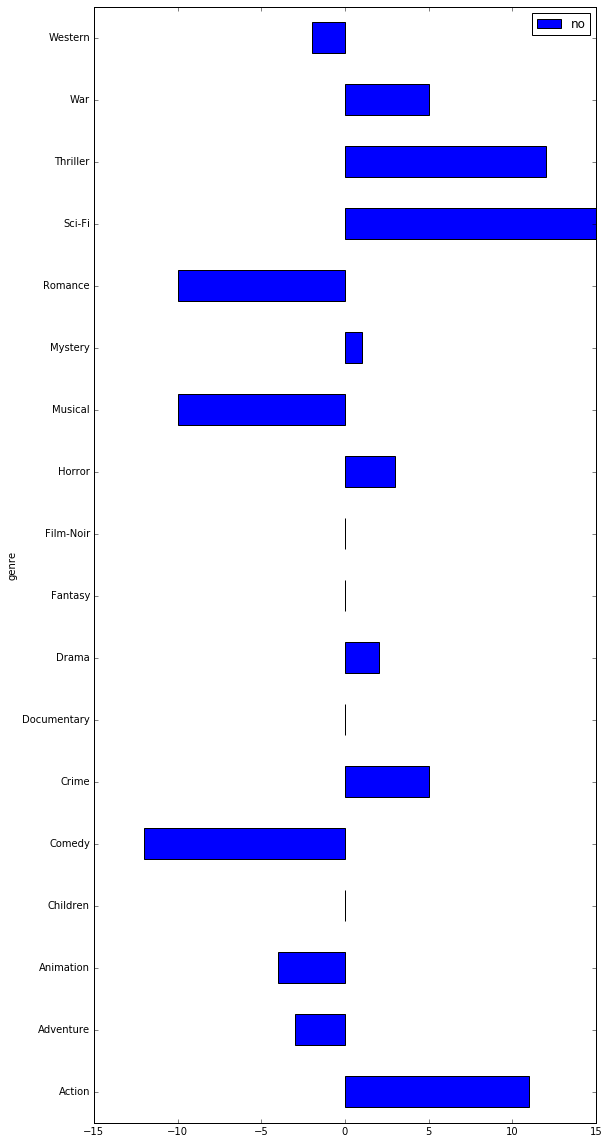

In [943]:
df = male_dataframe-female_dataframe
df.plot(kind="barh",figsize=[9,20])
plt.set_title("Male vs. Female Movie Genres")

In [944]:
small_data = data.ix[:,["user_id","movie_id","rating"]]
from sklearn.cross_validation import train_test_split
train , test, _ , _ = train_test_split(small_data,small_data ,test_size = 0.3)

In [945]:
from math import sqrt

def pearson_sim(user_a,user_b):
    avg_ratings = train.groupby("user_id").agg({"rating":np.mean}).reset_index()
    userA_avg = avg_ratings.loc[avg_ratings["user_id"] == user_a].rating.values[0]
    userB_avg = avg_ratings.loc[avg_ratings["user_id"] == user_b].rating.values[0]
    
    userA_movies_ratings = train.loc[train["user_id"] == user_a]
    userB_movies_ratings = train.loc[train["user_id"] == user_b]
    
    diffA = []
    diffB = []
    diff_squaredA = []
    diff_squaredB = []
    flag = 0
    for indexA,valA in userA_movies_ratings.iterrows():
        for indexB,valB in userB_movies_ratings.iterrows():
            if valA["movie_id"] == valB["movie_id"]:
                tempA = valA["rating"]-userA_avg
                diffA.append(tempA)
                tempB =valB["rating"]-userB_avg 
                diffB.append(tempB)
                diff_squaredA.append(pow(tempA,2)) 
                diff_squaredB.append(pow(tempB,2))



    
                
    num = []
    den = []
    for i in range(len(diffA)):
        num.append(diffA[i]*diffB[i])

    num = sum(num)
    den = sqrt(sum(diff_squaredA))*sqrt(sum(diff_squaredB))
    #print (diff_squaredA,diff_squaredB,flag)
    if den == 0:
        return 0
    else:
        return num/den 
    
    



In [955]:
import operator 

def predict(user_a,movie_id,data_used):
    #print "heee"
    reduced = data_used[:]
    #print reduced
    avg_ratings = reduced.groupby("user_id").agg({"rating":np.mean}).reset_index()
    userA_avg = avg_ratings.loc[avg_ratings["user_id"] == user_a].rating.values[0]
    
    numerator = []
    denominator = []
    
    removed_duplicates = reduced.drop_duplicates("user_id") #make it train again
    #print removed_duplicates
    userA_data = reduced.loc[reduced["user_id"] == user_a]
    #print userA_data
    for indexB,valB in removed_duplicates.iterrows():
        if valB["user_id"] != user_a:
            temp = reduced.loc[reduced["user_id"] == valB["user_id"]]
            #print (sim,temp)
            rating = temp.loc[temp["movie_id"] == movie_id]
            if len(rating)==0:
                #print "movie not rated by the other user"
                continue
            
            sim = pearson_sim(user_a,valB["user_id"])
            if sim <= 0:
                #print "sim"
                continue 
            
            if movie_id in userA_data.movie_id.values:
                #print "dup"
                #continue 
                pass
            
            #sim[valB["user_id"]] = pearson_sim(1,valB["user_id"])
            userB_avg = avg_ratings.loc[avg_ratings["user_id"] == valB["user_id"]].rating.values[0]
            #print userB_avg

            
            rating = temp.loc[temp["movie_id"] == movie_id].rating.values[0]
            rating = rating - userB_avg
            numerator.append(sim * rating)
            #print "deeeeeen"
            denominator.append(sim)

    numerator = sum(numerator)
    denominator = sum(denominator)
    #print denominator
    if denominator == 0:
        return 0
    else:
        return userA_avg + (numerator/denominator)
    

In [ ]:
from math import floor
pred_ratings = {}
y_true = test[:500].rating.values
y_pred = []
count = 0
for index,val in test.iterrows():
    if count == 500:
        break
    pred = predict(val["user_id"],val["movie_id"],data)
    pred = floor(pred)
    y_pred.append(pred) 
    pred_ratings[val["user_id"]] = (val["movie_id"],pred)
    count += 1
    print count 
print pred_ratings
print y_pred
from sklearn.metrics import accuracy_score
score = accuracy_score(y_true,y_pred)
print ("score {}".format(score))
#sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)[source]

In [976]:
arr = [3.0, 4.0, 4.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 4.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 4.0]
y_true = test[:20].rating.values
score = accuracy_score(y_true,y_pred)
y_true

array([3, 3, 3, 4, 5, 4, 2, 4, 4, 3, 2, 5, 3, 4, 4, 4, 1, 5, 2, 5])

In [961]:
dic = {2:3,4:5}
for i,j in dic.iteritems():
    print i,j

2 3
4 5
